# Práctica: Modelos computacionales de la actividad neuronal

## El modelo Hodgkin-Huxley

Los potenciales de acción son fluctuaciones de voltaje autopropagadas que se producen al abrirse y cerrarse los canales iónicos dependientes de voltaje. El modelo de Hodgkin-Huxley describe 3 canales iónicos, dos de los cuales contienen puertas dependientes del voltaje:

* **Canal de Na⁺ regulado por voltaje** con 2 puertas dependientes de voltaje (`m` y `h`)
* **Canal de K⁺ activado por voltaje** con 1 puerta dependiente de voltaje (`n`)
* **Canal de fuga K⁺** sin puerta

Las conductancias de los canales activados por voltaje dependen de la actividad de las puertas. La actividad de la puerta depende del voltaje y del tiempo. Las puertas se abren y cierran exponencialmente con constantes temporales (`alfa` y `beta`) que dependen del voltaje. El voltaje es una función de la suma de las corrientes de los canales y está influenciado por la capacitancia.

![](https://github.com/swharden/HHSharp/blob/master/dev/theory.png?raw=true)

Aunque podemos definir cada uno de estos elementos como una ecuación individual, en conjunto estas ecuaciones dependen unas de otras (lo que las convierte en un conjunto de _ecuaciones diferenciales_). El modelo de Hodgkin-Huxley utiliza un conjunto de cuatro ecuaciones diferenciales para describir el voltaje de una neurona:

$C\frac{dV}{dt} = -(\bar{g}_{Na} m^{3} h (V -E_{Na}) + \bar{g}_{K} n^{4} (V-E_K) + g_{leak} (V - E_{leak})) + I(t) $

$\frac{dx}{dt} = \alpha_{x} (1-x)  - \beta_{x}, \quad x\in {\rm{\{m, h, n\}}}$

$\alpha_m(V) = \frac{0.1(V+40)}{1-\exp(\frac{-(V + 40)} {10})}, \quad \beta_m(V) = 4.0 \exp(\frac{-(V + 65)} {18})$

$\alpha_h(V) = 0.07 \exp(\frac{-(V+65)}{20}), \quad \beta_h(V) = \frac 1 {1 + \exp(\frac{-(V + 35)} {10})}$

$\alpha_n(V) = \frac {0.01(V+55)}{1-\exp(-(V+55)/10)}, \quad \beta_n(V) = 0.125 \exp(\frac{-(V + 65)} {80})$

Podemos simular estas ecuaciones en la computadora para producir un modelo de neurona que dispare potenciales de acción. Realizaremos esto con la ayuda del paquete `Brainpy` del lenguaje de programación Python:

In [ ]:
!pip install brainpy==2.4.3
!pip install jax==0.4.9
!pip install jaxlib==0.4.9

In [15]:
import brainpy as bp
from brainpy._src.initialize import Uniform
import matplotlib.pyplot as plt


## Función de ejecución del modelo
def run_HH_model(gNa=120, gK=36, gL=0.03, i=10):
    hh = bp.neurons.HH(
        size=1,
        gNa=gNa,
        gK=gK,
        gL=gL,
        V_initializer=Uniform(min_val=-65, max_val=-60, seed=255),
    )
    runner = bp.DSRunner(hh, monitors=["V", "m", "h", "n"], inputs=("input", i))
    runner.run(100.0)

    plt.figure(figsize=(9, 4))
    bp.visualize.line_plot(
        runner.mon.ts,
        runner.mon.V,
        show=True,
        xlabel="Tiempo (ms)",
        ylabel="Voltaje (mV)",
        title="Potencial de membrana",
    )

    plt.figure(figsize=(9, 2))
    plt.plot(runner.mon["ts"], runner.mon["m"], label="m")
    plt.plot(runner.mon["ts"], runner.mon["n"], label="n")
    plt.plot(runner.mon["ts"], runner.mon["h"], label="h")
    plt.xlabel("Tiempo (ms)")
    plt.ylabel("Activación")
    plt.title("Actividad de puertas iónicas")
    plt.legend()
    plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

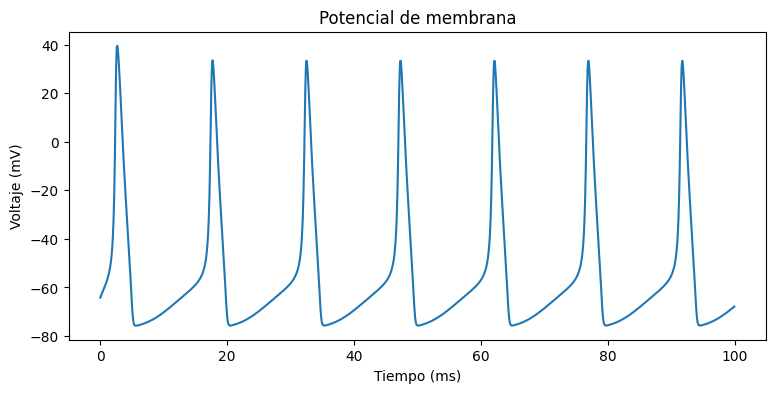

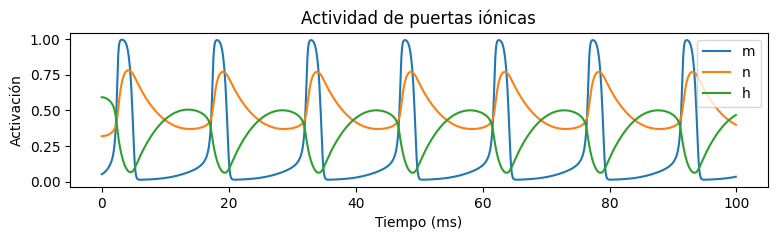

In [16]:
## Código para ejecutar el modelo
run_HH_model(gNa=120, gK=36, gL=0.03, i=10.0)

> Toma este modelo y los valores de sus parámetros como referencia para las preguntas a ser respondidas a continuación.

## Pregunta 1

Reduce el input eléctrico (parámetro `i`) de la neurona a la mitad. ¿Qué cambios observas en la dinámica del potencial de membrana? ¿Cómo se relacionan estos cambios con la actividad de las puertas iónicas? (5 puntos)

  0%|          | 0/1000 [00:00<?, ?it/s]

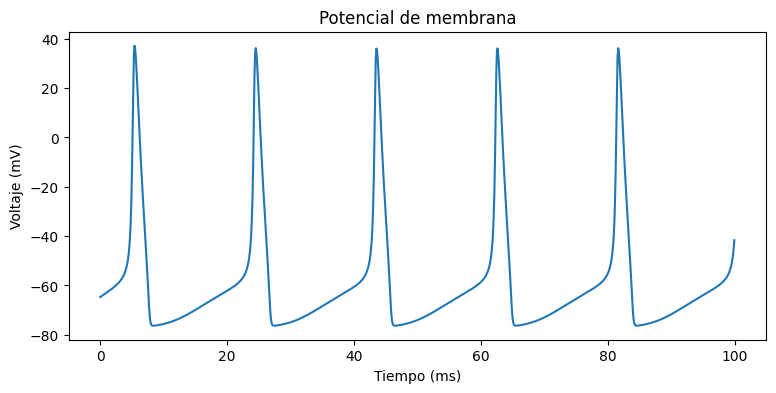

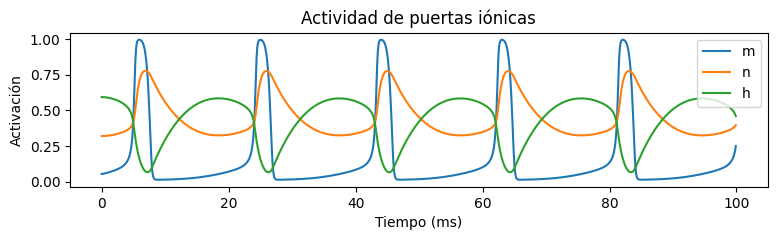

In [9]:
# Escribe tu respuesta aquí
run_HH_model(gNa=120, gK=36, gL=0.03, i=5)

Se observa una reducción en la frecuencia de disparo de la neurona simulada, lo cual se expresa en una menor cantidad de picos de voltaje en el potencial de membrana. Del mismo modo, puede apreciarse que la puerta iónica de sodio (`m`) tarda más tiempo en activarse y se activa con menor frecuencia en relación al modelo original. 

Esto ocurriría debido a que un menor input eléctrico externo retrasa el tiempo que tarda la neurona en superar el potencial de umbral y la consecutiva apertura de los canales de sodio. 

## Pregunta 2

Reduce la conductancia del canal de sodio (parámetro `gNa`) a la mitad. ¿Qué cambios observas en la dinámica del voltaje de membrana? ¿Cómo se relacionan estos cambios con la actividad de las puertas iónicas? (5 puntos)

  0%|          | 0/1000 [00:00<?, ?it/s]

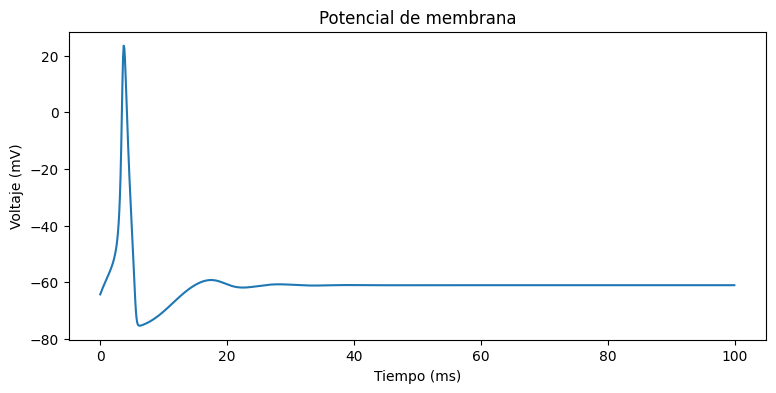

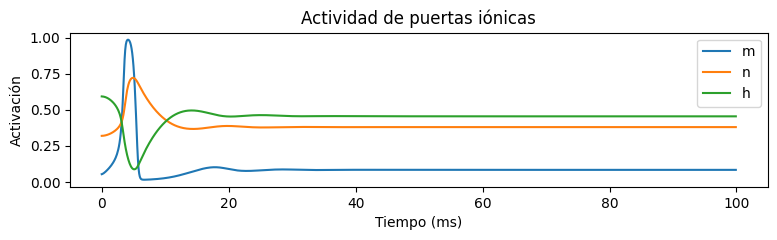

In [10]:
run_HH_model(gNa=60, gK=36, gL=0.03, i=10)

Se observa que la neurona simulada solo dispara en una ocasión durante el tiempo de simulación, y el pico alcanzado es más pequeño (20 mV) en comparación a los del modelo original. 

A nivel de las puertas iónicas, puede apreciarse que la puerta de voltaje de sodio (`m`) solo se activa una vez y luego se mantiene en reposo. En contraste, la puerta de inactivación de sodio (`h`) se mantiene en actividad constante durante la simulación. 

Estos cambios pueden deberse a que el potencial excitatorio proveniente del ingreso del sodio en la neurona fue reducido a la mitad, con lo cual su impacto excitatorio en el potencial de la membrana es reducido. Esto lleva a que la neurona no vuelva a superar el potencial de umbral y por tanto las puertas de sodio se mantienen inactivas durante el resto de la simulación.  

## Pregunta 3

Reduce la conductancia del canal activo de potasio (parámetro `gK`) a la cuarta parte. ¿Qué cambios observas en la dinámica del voltaje de membrana? ¿Cómo se relacionan estos cambios con la actividad de las puertas iónicas? (5 puntos)

  0%|          | 0/1000 [00:00<?, ?it/s]

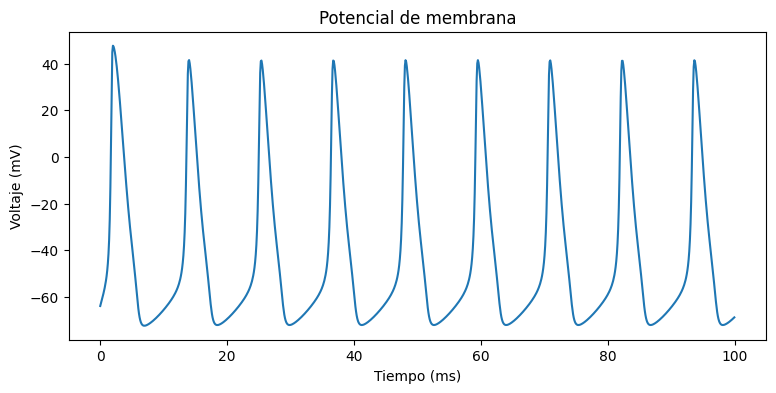

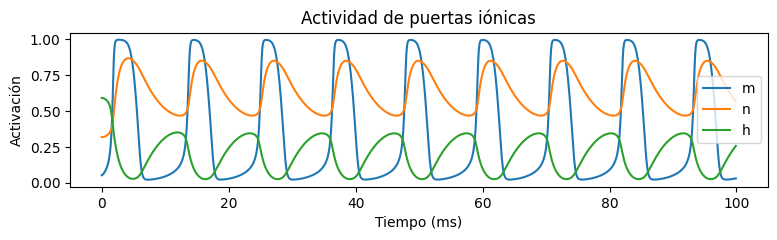

In [11]:
run_HH_model(gNa=120, gK=9, gL=0.03, i=10)

Se observa un aumento en la frecuencia de disparo de la neurona simulada, lo cual se expresa en una mayor cantidad de picos de voltaje en el potencial de membrana. Además, el potencial de membrana después de cada disparo es visiblemente mayor en comparación al modelo original.

Del mismo modo, puede apreciarse que la puerta iónica de sodio (`m`) se activa con mayor frecuencia en relación al modelo original. Notablemente, la puerta iónica de potasio (`n`) se activa con mayor frecuencia y a una magnitud mayor en comparación al modelo original. Asimismo, la puerta de inactivación de sodio (`h`) presenta fluctuaciones más frecuentes y con una magnitud menor. 

Estos cambios pueden explicarse considerando que el impacto inhibitorio del canal de potasio fue reducido a la cuarta parte, con lo cual la neurona simulada tenderá a mantenerse más cerca al potencial de umbral facilitando su activación constante. 

## Pregunta 4

Multiplica por 20 la conductancia del canal pasivo de potasio (parámetro `gL`). ¿Qué cambios observas en la dinámica del voltaje de membrana? ¿Cómo se relacionan estos cambios con la actividad de las puertas iónicas? (5 puntos)

  0%|          | 0/1000 [00:00<?, ?it/s]

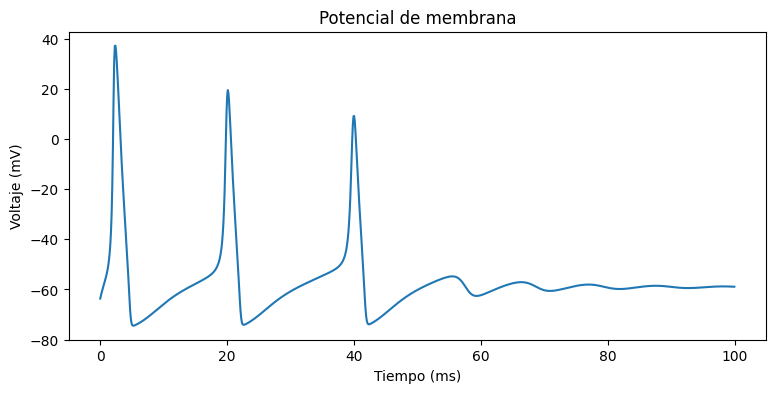

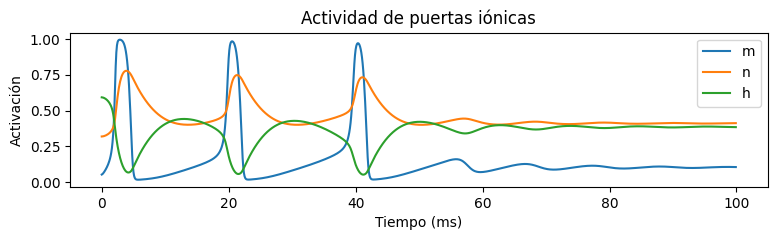

In [12]:
run_HH_model(gNa=120, gK=36, gL=0.6, i=10)

Puede apreciarse que la neurona simulada dispara en tan solo tres ocasiones. Asimismo, los picos alcanzados son de una amplitud menor en comparación al modelo original.

A nivel de las puertas iónicas, puede apreciarse que estas solo presentan actividad en tres ciclos. Notablemente, la puerta de inactivación de sodio (h) presenta niveles de activación reducidos en comparación al modelo origiinal. 

Estos cambios se explican por el aumento del impacto inhibitorio de la puerta pasiva de potasio, lo cual facilitaría que más iones positivos de potasio salgan de la neurona, disminuyendo de manera constante el potencial de membrana de la neurona. Esta inhibición constante llevaría a que progresivamente la neurona no pueda superar el potencial de umbral para que las puertas activadas por voltaje, principalmente la de sodio, puedan activarse.  